In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
chunk_size = 100000
labelled_reddit_sample = pd.DataFrame()  # Initialize an empty DataFrame

# Read and concatenate chunks from the file
for chunk in pd.read_csv('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/reddit_sample_data/labelled_reddit_sample_total.csv', chunksize=chunk_size, engine='python', on_bad_lines='warn', encoding='utf-8'):
  labelled_reddit_sample = pd.concat([labelled_reddit_sample, chunk], ignore_index=True)

In [ ]:
# Extract toxicity values
labelled_reddit_sample['label'] = labelled_reddit_sample['label'].apply(lambda x: eval(x) if isinstance(x, str) else x)
labelled_reddit_sample['toxicity'] = labelled_reddit_sample['label'].apply(lambda x: x.get('toxicity', 0))

In [ ]:
# Define a mapping for subreddit_id to subreddit names
subreddit_mapping = {'t5_2qh8c': 'singapore', 't5_xnx04': 'SingaporeRaw', 't5_70s6ew': 'singaporehappenings'}

# Create 'subreddit' column by mapping subreddit_id values
labelled_reddit_sample['subreddit'] = labelled_reddit_sample['subreddit_id'].map(subreddit_mapping)

In [ ]:
labelled_reddit_sample.head(5)

,text,username,parent_id,id,subreddit_id,topic,date,time,cleaned_text,quarter_year,label,toxicity,subreddit
0,"Nowadays ah beng only know how to ""CB limpei g...",hatuah,t1_fs6aspm,fs6losq,t5_2qh8c,man 20 allegedly slashed in ambush by 4 or 5 men,2020-05-29,09:09:33,"nowadays beng only know how to ""cb limpei goin...",2020Q2,"{'toxicity': 0.0005571579, 'severe_toxicity': ...",0.000557,singapore
1,It mentions the same mechanisms that I did: bl...,DuePomegranate,t1_fqlzzgb,fqnrcva,t5_2qh8c,coronavirus doctors see huge drop in flu common,2020-05-14,23:46:12,it mentions the same mechanisms that i did: bl...,2020Q2,"{'toxicity': 0.00077743153, 'severe_toxicity':...",0.000777,singapore
2,They probably outsource delivery to delivery c...,_Hysteric_,t1_fnedu77,fneem0a,t5_2qh8c,rsingapore random discussion and small questions,2020-04-14,18:13:10,they probably outsource delivery to delivery c...,2020Q2,"{'toxicity': 0.00086503004, 'severe_toxicity':...",0.000865,singapore
3,Wow its such a blessing to come across this po...,azura_eldoris,t3_g2gvgk,fuuw0jc,t5_2qh8c,resigning in the midst of covid19,2020-06-15,01:32:39,wow its such a blessing to come across this po...,2020Q2,"{'toxicity': 0.0033727682, 'severe_toxicity': ...",0.003373,singapore
4,"Yea, you can just bring them in.",alvinism,t1_fmazvyu,fmb2w2h,t5_2qh8c,rsingapore random discussion and small questions,2020-04-03,12:26:54,"yea, you can just bring them in.",2020Q2,"{'toxicity': 0.002860568, 'severe_toxicity': 2...",0.002861,singapore


# Toxic Comments by Quarter (Count, Percentage)

In [ ]:
toxicity_threshold = 0.93597454

# Count total comments and toxic comments per quarter
total_counts = labelled_reddit_sample.groupby('quarter_year').size()
toxic_counts = labelled_reddit_sample[labelled_reddit_sample['toxicity'] > toxicity_threshold] \
    .groupby('quarter_year').size()

# Convert to DataFrames
total_counts_df = total_counts.reset_index(name='total_count')
toxic_counts_df = toxic_counts.reset_index(name='toxic_count')

# Merge the two DataFrames on 'quarter_year'
counts_df = pd.merge(total_counts_df, toxic_counts_df, on='quarter_year', how='left').fillna(0)

# Calculate percentage of toxic comments
counts_df['percentage_toxic'] = (counts_df['toxic_count'] / counts_df['total_count']) * 100

print(counts_df)

   quarter_year  total_count  toxic_count  percentage_toxic
0        2020Q1        13914          469          3.370706
1        2020Q2        13914          486          3.492885
2        2020Q3        13914          347          2.493891
3        2020Q4        13914          405          2.910737
4        2021Q1        13914          408          2.932298
5        2021Q2        13914          469          3.370706
6        2021Q3        13914          516          3.708495
7        2021Q4        13914          576          4.139715
8        2022Q1        13914          629          4.520627
9        2022Q2        13914          597          4.290643
10       2022Q3        13914          531          3.816300
11       2022Q4        13914          522          3.751617
12       2023Q1        13914          551          3.960040
13       2023Q2        13913          632          4.542514
14       2023Q3        13914          653          4.693115
15       2023Q4        13914          80

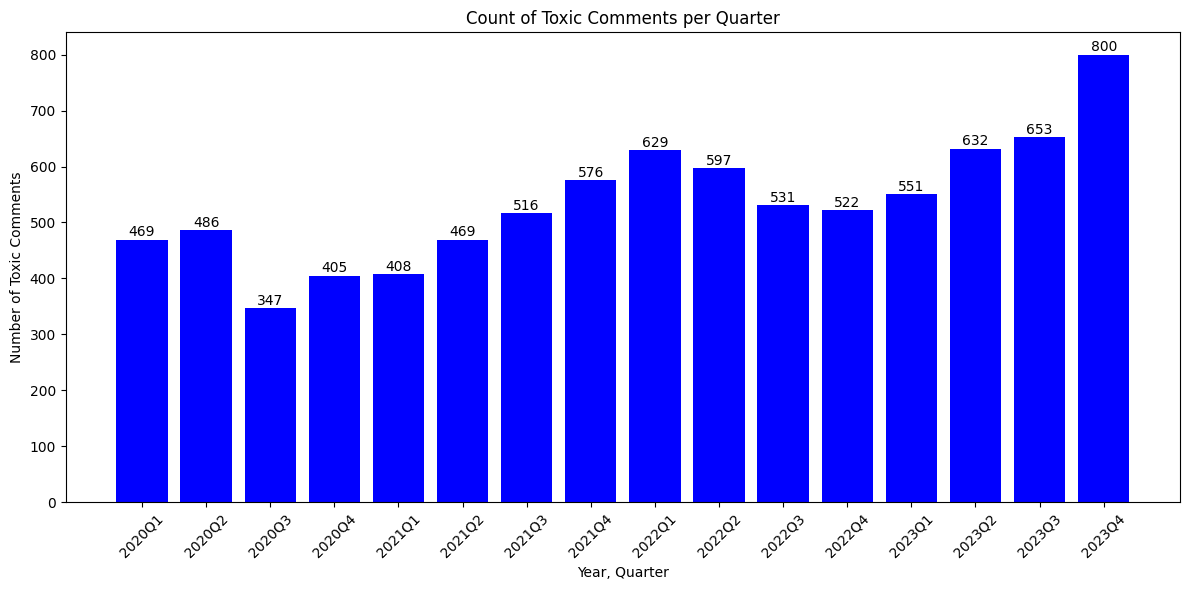

In [ ]:
# Bar Graph of Count of Toxic Comments per Quarter (from sample of 13914 total comments per quarter)

plt.figure(figsize=(12, 6))
bars = plt.bar(toxic_counts_df['quarter_year'], toxic_counts_df['toxic_count'], color='blue')
plt.title('Count of Toxic Comments per Quarter')
plt.xlabel('Year, Quarter')
plt.ylabel('Number of Toxic Comments')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{int(yval)}", ha='center', va='bottom', color='black')

plt.show()

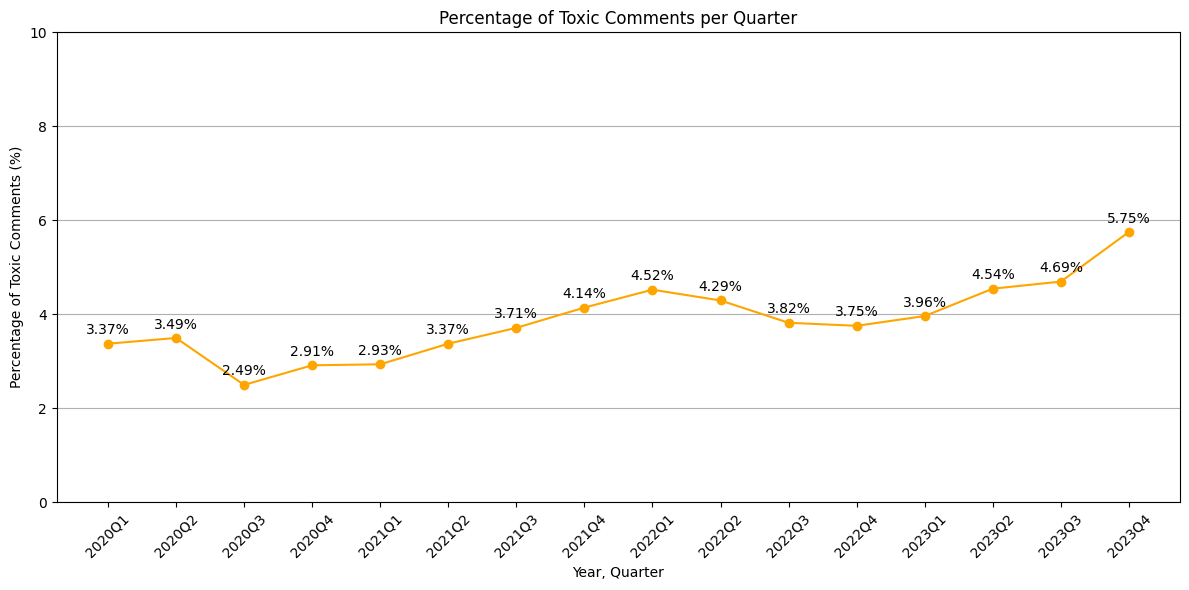

In [ ]:
# Line Graph of Percentage of Toxic Comments per Quarter

plt.figure(figsize=(12, 6))
plt.plot(counts_df['quarter_year'], counts_df['percentage_toxic'], marker='o', color='orange', linestyle='-')
plt.title('Percentage of Toxic Comments per Quarter')
plt.xlabel('Year, Quarter')
plt.ylabel('Percentage of Toxic Comments (%)')
plt.xticks(rotation=45)
plt.ylim(0, 10)  # Set y-axis range from 0 to 10%
plt.grid(axis='y')
plt.tight_layout()

for i, value in enumerate(counts_df['percentage_toxic']):
    plt.text(counts_df['quarter_year'][i], value + 0.2, f"{value:.2f}%", ha='center', color='black')

plt.show()

# Toxic Comments by SubReddit and Quarter (Count, Percentage)

In [ ]:
# Count total toxic comments by quarter
toxic_comments = labelled_reddit_sample[labelled_reddit_sample['toxicity'] > toxicity_threshold]

# Count toxic comments by subreddit and quarter
toxic_counts_by_subreddit_and_quarter = toxic_comments.groupby(['subreddit', 'quarter_year']).size().reset_index(name='toxic_count')

# Count total toxic comments by quarter
total_toxic_counts_by_quarter = toxic_comments.groupby('quarter_year').size().reset_index(name='total_toxic_count')

# Merge total toxic counts with subreddit counts
toxic_counts_by_subreddit_and_quarter = pd.merge(toxic_counts_by_subreddit_and_quarter, total_toxic_counts_by_quarter, on='quarter_year', how='left')

# Add total toxic count to the DataFrame for plotting
toxic_counts_by_subreddit_and_quarter['subreddit'] = toxic_counts_by_subreddit_and_quarter['subreddit'].fillna('Total')

print(toxic_counts_by_subreddit_and_quarter)


              subreddit quarter_year  toxic_count  total_toxic_count
0          SingaporeRaw       2020Q1            2                469
1          SingaporeRaw       2020Q2            3                486
2          SingaporeRaw       2020Q3            2                347
3          SingaporeRaw       2020Q4            9                405
4          SingaporeRaw       2021Q1            3                408
5          SingaporeRaw       2021Q2           14                469
6          SingaporeRaw       2021Q3           62                516
7          SingaporeRaw       2021Q4           94                576
8          SingaporeRaw       2022Q1          111                629
9          SingaporeRaw       2022Q2          226                597
10         SingaporeRaw       2022Q3          154                531
11         SingaporeRaw       2022Q4          119                522
12         SingaporeRaw       2023Q1          144                551
13         SingaporeRaw       2023

<Figure size 1400x800 with 0 Axes>

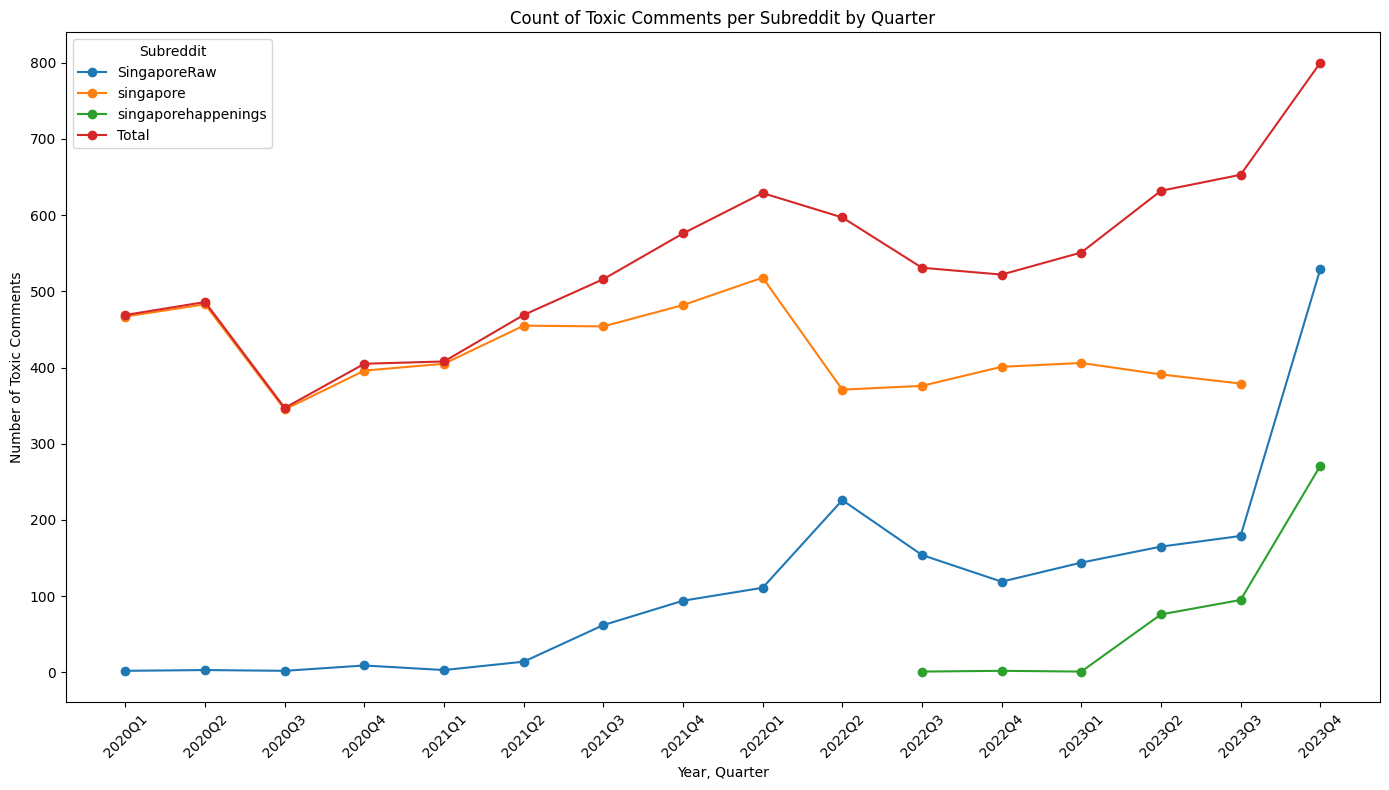

In [ ]:
# Line Graph of Count of Toxic Comments per Subreddit per Quarter

pivot_df = toxic_counts_by_subreddit_and_quarter.pivot(index='quarter_year', columns='subreddit', values='toxic_count')
pivot_df.loc[:, 'Total'] = pivot_df.sum(axis=1)
plt.figure(figsize=(14, 8))
pivot_df.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Count of Toxic Comments per Subreddit by Quarter')
plt.xlabel('Year, Quarter')
plt.ylabel('Number of Toxic Comments')
plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index, rotation=45)
plt.legend(title='Subreddit')
plt.tight_layout()

plt.show()

In [ ]:
# Count total comments by subreddit and quarter
total_counts_by_subreddit_and_quarter = labelled_reddit_sample.groupby(['subreddit', 'quarter_year']).size().reset_index(name='total_count')

# Count toxic comments by subreddit and quarter
toxic_comments = labelled_reddit_sample[labelled_reddit_sample['toxicity'] > toxicity_threshold]
toxic_counts_by_subreddit_and_quarter = toxic_comments.groupby(['subreddit', 'quarter_year']).size().reset_index(name='toxic_count')

# Merge the two dataframes to calculate the percentage
combined_df = pd.merge(total_counts_by_subreddit_and_quarter, toxic_counts_by_subreddit_and_quarter, on=['subreddit', 'quarter_year'], how='left')
combined_df['toxic_count'] = combined_df['toxic_count'].fillna(0)  # Fill NaN values with 0
combined_df['percentage_toxic'] = (combined_df['toxic_count'] / combined_df['total_count']) * 100

print(combined_df)


              subreddit quarter_year  total_count  toxic_count  \
0          SingaporeRaw       2020Q1           33            2   
1          SingaporeRaw       2020Q2           28            3   
2          SingaporeRaw       2020Q3           22            2   
3          SingaporeRaw       2020Q4           97            9   
4          SingaporeRaw       2021Q1           82            3   
5          SingaporeRaw       2021Q2          163           14   
6          SingaporeRaw       2021Q3          998           62   
7          SingaporeRaw       2021Q4         1404           94   
8          SingaporeRaw       2022Q1         1549          111   
9          SingaporeRaw       2022Q2         3177          226   
10         SingaporeRaw       2022Q3         2926          154   
11         SingaporeRaw       2022Q4         2170          119   
12         SingaporeRaw       2023Q1         2372          144   
13         SingaporeRaw       2023Q2         2470          165   
14        

<Figure size 1400x800 with 0 Axes>

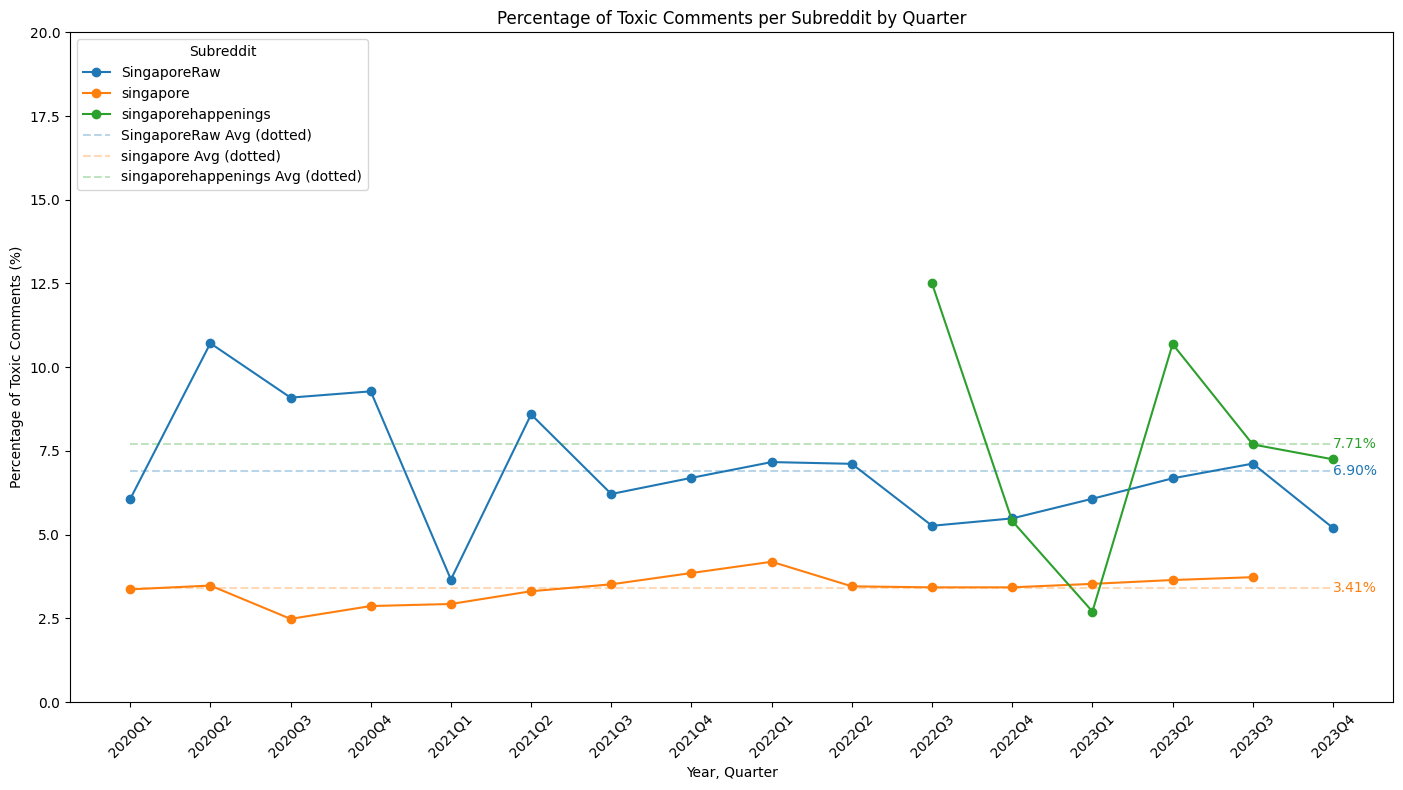

In [ ]:
# Line Graph of Percentage of Toxic Comments per Subreddit per Quarter

pivot_df = combined_df.pivot(index='quarter_year', columns='subreddit', values='percentage_toxic')
average_percentage_toxic = pivot_df.mean() # Calculate the average percentage of toxic comments for each subreddit
plt.figure(figsize=(14, 8))
ax = pivot_df.plot(kind='line', marker='o', figsize=(14, 8))

# Plot the average percentage toxic line for each subreddit
for subreddit in pivot_df.columns:
    color = ax.lines[tuple(pivot_df.columns).index(subreddit)].get_color()

    plt.plot(pivot_df.index, [average_percentage_toxic[subreddit]] * len(pivot_df),
             linestyle='--', color=color, alpha=0.3, label=f'{subreddit} Avg (dotted)')

    plt.text(pivot_df.index[-1], average_percentage_toxic[subreddit],
             f'{average_percentage_toxic[subreddit]:.2f}%', color=color,
             ha='left', va='center', fontsize=10)

plt.title('Percentage of Toxic Comments per Subreddit by Quarter')
plt.xlabel('Year, Quarter')
plt.ylabel('Percentage of Toxic Comments (%)')
plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index, rotation=45)
plt.legend(title='Subreddit', loc='upper left')
plt.tight_layout()
plt.ylim(0, 20) # Set y-axis limit

plt.show()
